# Black hole mass and accretion rate

## 1) Estimate MBH using scaling relations derived from reverberation mapping studies + estimation of accretion rate

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [2]:
shen11_500 = pd.read_csv('shen_subsample_500.csv', sep=',')
shen11_500.head()

,RAJ2000,DEJ2000,Plate,Fiber,MJD,iMAG,logLbol,e_logLbol,logLBHb,e_logLBHb,W_BHb_,e_W_BHb_,EWBHb,e_EWBHb,SN_Hb_,logBH,e_logBH,logEdd
0,189.67804,45.30687,1372,486,53062,-23.20,45.236,0.004,42.35,0.02,4399.3,330.1,62.0,3.1,23.06,8.33,0.07,-1.20
1,189.77188,41.44564,1984,609,53433,-22.29,44.819,0.005,42.11,0.04,2371.4,541.6,89.4,8.7,15.06,7.59,0.20,-0.87
2,189.81419,53.23740,885,449,52379,-22.69,45.121,0.004,41.93,0.04,10756.6,4366.4,32.1,3.4,16.27,9.05,0.35,-2.03
3,189.93733,19.90707,2614,350,54481,-23.37,45.132,0.001,42.55,0.02,15241.3,362.8,118.7,6.3,19.79,9.36,0.02,-2.33
4,189.99405,49.09448,1278,96,52735,-22.77,45.166,0.011,42.25,0.01,1385.6,48.6,52.5,2.9,15.96,7.29,0.03,-0.23


To begin, cross-match provided catalog with SDSS to obtain Hβ flux and redshift.

In [3]:
from astroquery.sdss import SDSS

with open('query.txt', 'r') as file:
    query = file.read().replace('\n', '') ## input is a single string

cat = SDSS.query_sql(query).to_pandas()

cat

,plate,mjd,fiberid,z,subclass,e_bv_sfd,h_beta_flux,sigma_balmer
0,269,51910,101,0.187017,BROADLINE,0.038754,4.153362e+01,174.6909
1,271,51883,277,0.094431,STARBURST BROADLINE,0.034807,1.037423e+02,259.7066
2,273,51957,319,0.218394,BROADLINE,0.056977,2.761646e+01,322.6188
3,278,51900,437,0.496669,BROADLINE,0.031600,1.009322e+02,500.0000
4,282,51658,138,0.268285,BROADLINE,0.021614,3.155262e+02,500.0000
...,...,...,...,...,...,...,...,...
22169,2878,54465,19,0.032217,AGN,0.038002,2.525288e+02,165.4296
22170,2920,54562,52,0.208107,STARBURST BROADLINE,0.025765,9.366834e+01,290.7950
22171,2953,54560,7,0.128517,STARBURST BROADLINE,0.060926,5.243729e+02,500.0000
22172,2959,54537,408,0.415695,NaN,0.055129,4.231336e+09,387.5148


In [4]:
for id_shen11_500, plate_shen11_500, mjd_shen11_500, fiber_shen11_500 in zip(shen11_500.index, shen11_500['Plate'], shen11_500['MJD'], shen11_500['Fiber']):
        for id_cat, plate_cat, mjd_cat, fiber_cat in zip(cat.index, cat['plate'], cat['mjd'], cat['fiberid']):
                if plate_cat == plate_shen11_500 and mjd_cat == mjd_shen11_500 and fiber_cat == fiber_shen11_500:
                        shen11_500.loc[id_shen11_500, 'found'] = "yes"
                        shen11_500.loc[id_shen11_500, 'z'] = cat.loc[id_cat, 'z']
                        ## sdss flux is in 10**-17 erg/cm2/s
                        shen11_500.loc[id_shen11_500, 'Flux_Hb'] = 10**-17 * cat.loc[id_cat, 'h_beta_flux'] 
                        ## velocity dispersion to FWHM
                        shen11_500.loc[id_shen11_500, 'FWHM_Hb'] = 2.36 * cat.loc[id_cat, 'sigma_balmer']

In [7]:
match = shen11_500[shen11_500['found']=="yes"]
no_match = shen11_500[shen11_500['found']!="yes"]

#Objects not identified as they are not classified as 'QSO' or have no data on H beta flux by SDSS
no_match

,RAJ2000,DEJ2000,Plate,Fiber,MJD,iMAG,logLbol,e_logLbol,logLBHb,e_logLBHb,...,EWBHb,e_EWBHb,SN_Hb_,logBH,e_logBH,logEdd,found,z,Flux_Hb,FWHM_Hb
6,190.40521,44.74830,1372,589,53062,-22.45,45.066,0.002,41.42,0.03,...,10.2,0.67,18.00,7.32,0.06,-0.35,NaN,NaN,NaN,NaN
15,191.35986,7.73209,1790,472,53876,-22.72,45.151,0.006,41.81,0.10,...,21.4,5.40,15.68,8.97,0.24,-1.92,NaN,NaN,NaN,NaN
56,195.60806,-1.08644,294,299,51986,-22.84,45.250,0.004,41.85,0.07,...,18.5,3.50,20.12,8.77,0.27,-1.62,NaN,NaN,NaN,NaN
94,197.82724,46.58397,1461,358,53062,-22.81,45.288,0.003,41.84,0.16,...,16.6,4.70,17.77,8.29,1.63,-1.11,NaN,NaN,NaN,NaN
132,200.50446,51.71045,1667,543,53430,-22.65,45.127,0.005,42.18,0.04,...,57.6,6.80,16.84,9.32,0.09,-2.29,NaN,NaN,NaN,NaN
173,204.31633,3.16016,528,522,52022,-22.31,45.039,0.003,41.63,0.07,...,18.6,3.10,20.55,8.91,0.22,-1.98,NaN,NaN,NaN,NaN
250,209.33116,39.67926,1378,158,53061,-23.15,45.371,0.004,41.97,0.04,...,18.0,1.60,28.55,7.84,0.15,-0.57,NaN,NaN,NaN,NaN
319,215.17027,6.84987,1826,495,53499,-22.56,45.129,0.006,42.13,0.05,...,50.9,6.10,17.70,9.13,0.17,-2.10,NaN,NaN,NaN,NaN
418,222.70886,12.84332,1714,408,53521,-22.77,45.183,0.003,41.79,0.06,...,18.0,2.70,17.12,7.45,0.14,-0.37,NaN,NaN,NaN,NaN


In [6]:
qso = match

qso

,RAJ2000,DEJ2000,Plate,Fiber,MJD,iMAG,logLbol,e_logLbol,logLBHb,e_logLBHb,...,EWBHb,e_EWBHb,SN_Hb_,logBH,e_logBH,logEdd,found,z,Flux_Hb,FWHM_Hb
0,189.67804,45.30687,1372,486,53062,-23.20,45.236,0.004,42.35,0.02,...,62.0,3.1,23.06,8.33,0.07,-1.20,yes,0.228846,3.239026e-15,1180.000000
1,189.77188,41.44564,1984,609,53433,-22.29,44.819,0.005,42.11,0.04,...,89.4,8.7,15.06,7.59,0.20,-0.87,yes,0.178252,4.481307e-15,1180.000000
2,189.81419,53.23740,885,449,52379,-22.69,45.121,0.004,41.93,0.04,...,32.1,3.4,16.27,9.05,0.35,-2.03,yes,0.201624,8.680108e-16,681.925540
3,189.93733,19.90707,2614,350,54481,-23.37,45.132,0.001,42.55,0.02,...,118.7,6.3,19.79,9.36,0.02,-2.33,yes,0.239360,3.700913e-15,534.670980
4,189.99405,49.09448,1278,96,52735,-22.77,45.166,0.011,42.25,0.01,...,52.5,2.9,15.96,7.29,0.03,-0.23,yes,0.235311,5.892418e-15,978.193804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,231.08040,27.95578,1846,28,54173,-23.33,45.423,0.005,42.56,0.02,...,60.6,3.4,24.76,9.08,0.03,-1.76,yes,0.284370,1.181586e-15,1180.000000
496,231.09229,26.70657,2160,444,53885,-22.72,44.989,0.005,42.19,0.04,...,73.2,6.8,17.34,8.20,0.10,-1.31,yes,0.236137,3.247374e-15,1180.000000
497,231.11946,30.54376,1650,545,53174,-24.56,45.891,0.001,43.14,0.01,...,76.1,1.9,40.15,8.19,0.04,-0.40,yes,0.273973,2.162260e-14,1180.000000
498,231.12225,35.25613,1354,466,52814,-22.60,45.143,0.005,41.80,0.05,...,21.0,2.7,15.44,7.38,0.14,-0.34,yes,0.249451,2.524941e-15,1024.362956


Do some exploratory data analysis of the sample: plot redshift and FWHM distribution of the sample, plot i-band magnitude vs. redshift, and describe sample limitations in terms of these plots and parameters (hint: pandas is useful for this).

Text(0, 0.5, 'count')

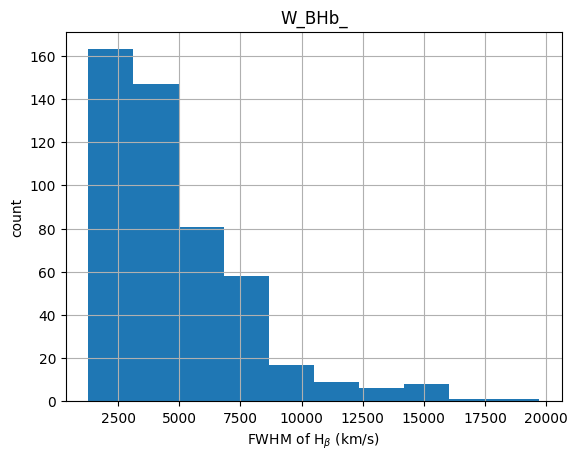

In [8]:
qso.hist(column='W_BHb_', bins=10)
plt.xlabel(r'FWHM of H$_\beta$ (km/s)')
plt.ylabel('count')

Text(0, 0.5, 'count')

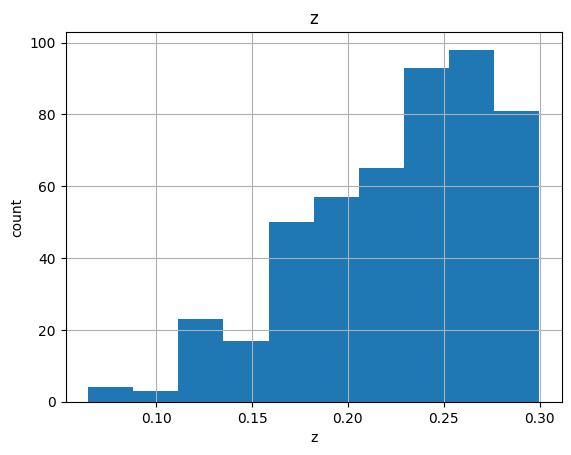

In [9]:
qso.hist(column='z', bins=10)
plt.xlabel('z')
plt.ylabel('count')

Text(0, 0.5, 'count')

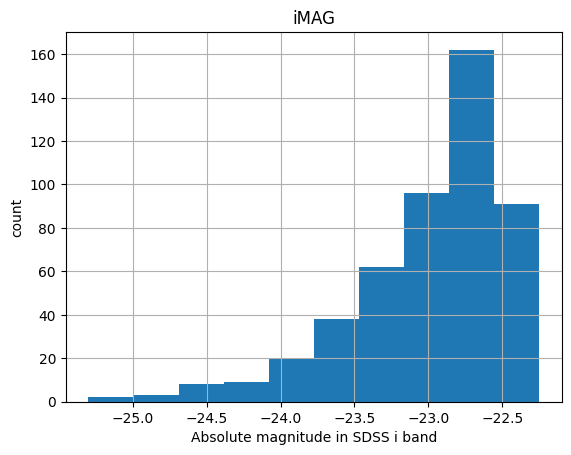

In [10]:
qso.hist(column='iMAG', bins=10)
plt.xlabel('Absolute magnitude in SDSS i band')
plt.ylabel('count')

Text(0.5, 1.0, 'Magnitude vs redshift')

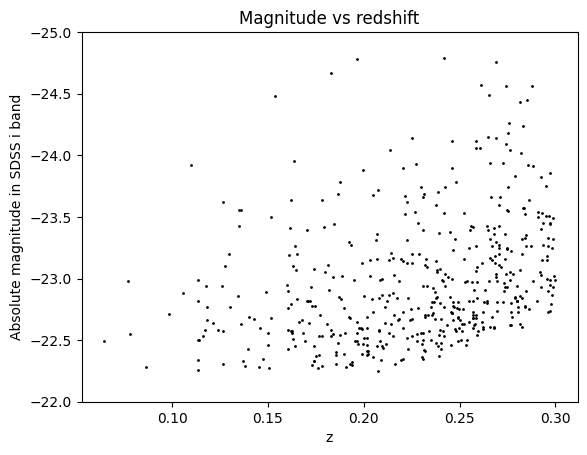

In [11]:
plt.scatter(qso['z'], qso['iMAG'], s=1, c='k')
plt.ylim(-22,-25)
plt.xlabel('z')
plt.ylabel('Absolute magnitude in SDSS i band')
plt.title("Magnitude vs redshift")

The sample has a selection of fainter and more distant QSOs.

Next, using the provided FWHM and SDSS data, find: 

The luminosity of the Hβ emission line. For this, you will need to calculate the luminosity distance for each object using formulas given by Hogg (2000). For cosmological constants, use ones from Planck (H0=67.8 km/s MPc, Ωm=0.31, Ωλ=0.69). Using luminosity distance, Hβ flux and redshift, find the luminosity of the Hβ emission line.

In [13]:
# cosmological constants
H0 = 67.8  # km / s Mpc
Omega_m = 0.31  # Matter density parameter
Omega_l = 0.69  # Dark energy density paramete

In [15]:
# astropy.cosmology for the luminosity distance
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=H0 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=Omega_m)

In [18]:
D_Ls = cosmo.luminosity_distance(qso['z'])
D_Ls  # in Mpc

0      1175.102391
1       889.101821
2      1019.518377
3      1236.225269
4      1212.616328
          ...     
495    1504.201758
496    1217.430633
497    1441.408536
498    1295.426371
499     679.660971
Name: z, Length: 491, dtype: float64

In [20]:
qso['lum_dist'] = np.asarray(D_Ls)

From the formula found in __[Hogg 2000](https://arxiv.org/abs/astro-ph/9905116)__:
\begin{align}
    \nu S_{\nu} = \frac{\nu_e L_{\nu_e}}{4 \pi {D_L}^2}
\end{align}

This is formula number 24 in the paper. $S_{\nu}$ is the differential flux at frequency $\nu$, $\nu_e = (1 + z) \nu$ is the emitted frequency, and $L_{\nu_e}$ is the differential luminosity at frequency $\nu$.

We can obtain the luminosity $L_{\nu_e}$:
\begin{align}
    L_{\nu_e} = 4 \pi {D_L}^2 S_{\nu} \frac{1}{(1 + z)}
\end{align}

In [21]:
def L_from_D_L(D_L, flux, redshift):
    '''
    Formula #24 from Hogg 2000
    Solved for luminosity

    Inputs:
    D_L: luminosity distance in Mpc
    flux: in 1e-17 erg / (s cm^2)
    redshift: dimensionless

    Output:
    Luminosity in erg / s
    '''

    # 1 pc = 3.0857e16 meters = 3.0857e18 centimeters
    D_L_cm = D_L * 1e6 *3.0857e18

    return 4 * np.pi * D_L_cm**2 * (flux * 1e-17) / (1 + redshift)

In [25]:
# prefix my_ is so that I can distinguish between given and calculated values
qso['my_L_h_beta'] = qso.apply(lambda x: L_from_D_L(x['lum_dist'], x['Flux_Hb'], x['z']), axis=1)
qso['my_log_L_h_beta'] = np.log10(qso['my_L_h_beta'])
qso[['my_L_h_beta', 'my_log_L_h_beta']].describe()

,my_L_h_beta,my_log_L_h_beta
count,4.910000e+02,491.000000
mean,6.087192e+24,24.600405
std,7.063962e+24,0.395656
min,2.246757e+23,23.351556
25%,2.194172e+24,24.341270
50%,4.003048e+24,24.602391
75%,7.435644e+24,24.871318
max,6.700309e+25,25.826095


Using the empirical relation from Section 3 in Wu (2009), calculate black hole mass using the luminosity of the Hβ line and FWHM Hβ. You should elaborate on the assumption you have to make to use this relation.

__[Wu 2009](http://adsabs.harvard.edu/abs/2009MNRAS.398.1905W)__, presents relations to calculate black hole (BH) masses, Eddington ratios and possible relations between [OIII] kinematics and the accretion and jet properties. These are valid for a specific type of AGN: GHz-peaked-spectrum (GPS) and compact steep-spectrum (CSS) radio sources, which are compact radio galaxies. Their spectra have a peak at ~1 GHz and ~1000 GHz respectively.

The sample presented in the paper is not a complete sample of radio galaxies. Instead, the author focused on making it characteristic of these kind of objects. The redshift distribution of this sample differs from the one used in this tutorial, as it goes from ~0.1 to ~3.5, whilst the sample analysed here has redshift below 0.30. In addition, radio galaxies may not necessarily be QSOs, so the type of AGN in both samples is not quite the same.

In Section 3.1, estimations for the BH mass are presented. Assuming that the gas around the BH is virialised, i.e. gravitationally bound to the BH, the BH mass can be estimated as:
\begin{align}
    M_{BH} = \frac{R_{BLR} V^2}{G},
\end{align}

where $R_{BLR}$ is the size of the broad line region (BLR), which is assumed to be isotropic, $V$ is estimated from the FWHM of a broad emission line and $G$ is the gravitational constant. 


\begin{align}
    M_{BH} = 2.4 \times 10^6 \left ( \frac{L_{ \text{H} \beta }}{10^{42} \text{ erg s}^{-1} } \right )^{0.59} \left ( \frac{ \text{FWHM}_{ \text{H} \beta } }{ 10^3 \text{ km s}^{-1} } \right )^2 M_{\odot}
\end{align}

In [27]:
def M_BH_Wu(L_h_beta, fwhm_h_beta):
    '''
    Formula #2 from Wu 2009

    Inputs:
    L_h_beta: luminosity of H beta line in erg / s
    fwhm_h_beta: FWHM of H beta line in km / s
    redshift: dimensionless

    Output:
    Black hole mass in solar masses
    '''
    return 2.4e6 * (L_h_beta / 1e42)**0.59 * (fwhm_h_beta / 1e3)**2

In [30]:
qso['Wu_BH_mass'] = qso.apply(lambda x: M_BH_Wu(x['my_L_h_beta'], x['FWHM_Hb']), axis=1)
qso['log_Wu_BH_mass'] = np.log10(qso['Wu_BH_mass'])
qso[['Wu_BH_mass', 'log_Wu_BH_mass']].describe() 

,Wu_BH_mass,log_Wu_BH_mass
count,491.000000,491.000000
mean,0.000195,-3.842432
std,0.000136,0.395158
min,0.000002,-5.665632
25%,0.000105,-3.977303
50%,0.000177,-3.752398
75%,0.000257,-3.589378
max,0.000958,-3.018629


Estimate the Eddington luminosity and Eddington ratio after having derived the bolometric luminosity (e.g., use empirical relations from Wu 2009).

Estimating the bolometric luminosity using equation 8 of the paper:
\begin{align}
    \log{L_{bol}} = \left ( 0.94 \pm 0.03 \right) \log{L_{ \text{H}\beta }} + (5.39 \pm 1.14)
\end{align}

This equation assumes that:
* $ L_{bol} = 9 L_{5100} $, where $L_{5100}$ is the monochromatic luminosity at $5100$ Ang.
* the galaxies are radio quiet, and thus, their optical thermal emission is not contaminated by non-thermal synchrotron emission.

It is specially useful for sources whose emission is likely contaminated by the beam of relativistic jets.

In [31]:
def log_Lbol_Wu(log_L_h_beta):
    '''
    Formula #8 from Wu 2009

    Input:
    log_L_h_beta: log of the luminosity of H beta line in erg / s

    Output:
    log of the bolometric luminosity in erg / s
    '''
    return 0.94 * log_L_h_beta + 5.39

In [33]:
qso['Wu_log_Lbol'] = qso.apply(lambda x: log_Lbol_Wu(x['my_log_L_h_beta']), axis=1)
qso['Wu_Lbol'] = qso.apply(lambda x: 10**(x['Wu_log_Lbol']), axis=1)
qso[['Wu_Lbol', 'Wu_log_Lbol', 'logLbol']].describe()

,Wu_Lbol,Wu_log_Lbol,logLbol
count,4.910000e+02,491.000000,491.000000
mean,4.750985e+28,28.514381,45.231990
std,5.057442e+28,0.371916,0.214986
min,2.190094e+27,27.340463,44.818000
25%,1.865497e+28,28.270794,45.088000
50%,3.282822e+28,28.516247,45.190000
75%,5.875428e+28,28.769039,45.334500
max,4.640119e+29,29.666529,46.118000


Estimate of the Eddington luminosity $L_{Edd}$ and ratio $L_{bol} / L_{Edd}$. For this, we'll use the relation which appears in Section 4.1 of the paper by Wu:
\begin{align}
    L_{Edd} = 1.38 \times 10^{38} \frac{M_{BH}}{M_{\odot}} [\text{erg s}^{-1}]
\end{align}

In [34]:
def L_Edd(M_BH):
    '''
    Input:
    M_BH: black hole mass in solas masses

    Output:
    Eddington luminosity in erg / s
    '''
    return 1.38e38 * M_BH

In [36]:
qso['L_Edd'] = qso.apply(lambda x: L_Edd(x['Wu_BH_mass']), axis=1)
qso['log_L_Edd'] = np.log10(qso['L_Edd'])
qso[['L_Edd', 'log_L_Edd']].describe()

,L_Edd,log_L_Edd
count,4.910000e+02,491.000000
mean,2.686100e+34,34.297447
std,1.879821e+34,0.395158
min,2.980208e+32,32.474247
25%,1.454065e+34,34.162576
50%,2.440510e+34,34.387481
75%,3.552259e+34,34.550501
max,1.322057e+35,35.121250


In [39]:
qso['Shen_L_Edd'] = qso.apply(lambda x: L_Edd(10**(x['logBH'])), axis=1)
qso['log_Shen_L_Edd'] = np.log10(qso['Shen_L_Edd'])
qso[['Shen_L_Edd', 'log_Shen_L_Edd']].describe()

,Shen_L_Edd,log_Shen_L_Edd
count,4.910000e+02,491.000000
mean,4.813611e+46,46.401101
std,6.822042e+46,0.494454
min,2.343576e+45,45.369879
25%,1.071221e+46,46.029879
50%,2.511187e+46,46.399879
75%,5.752797e+46,46.759879
max,6.164234e+47,47.789879


In [40]:
def Edd_ratio(L_Edd, L_bol):
    '''
    Input:
    L_Edd: Eddington luminosity in erg / 
    L_bol: Bolometric luminosity in erg / 

    Output:
    Eddington ratio [dimensionless]
    '''
    return L_bol / L_Edd

In [41]:
qso['Edd_ratio'] = qso.apply(lambda x: Edd_ratio(x['L_Edd'], x['Wu_Lbol']), axis=1)
qso['log_Edd_ratio'] = np.log10(qso['Edd_ratio'])
qso[['Edd_ratio', 'log_Edd_ratio']].describe()

,Edd_ratio,log_Edd_ratio
count,4.910000e+02,491.000000
mean,1.941398e-06,-5.783066
std,1.879563e-06,0.213659
min,5.575561e-07,-6.253711
25%,1.202920e-06,-5.919763
50%,1.497158e-06,-5.824732
75%,1.989628e-06,-5.701229
max,3.158328e-05,-4.500543


In [43]:
qso['Shen_Edd_ratio'] = qso.apply(lambda x: Edd_ratio(x['Shen_L_Edd'], 10**(x['logLbol'])), axis=1)
qso['log_Shen_Edd_ratio'] = np.log10(qso['Shen_Edd_ratio'])
qso[['Shen_Edd_ratio', 'log_Shen_Edd_ratio']].describe()

,Shen_Edd_ratio,log_Shen_Edd_ratio
count,491.000000,491.000000
mean,0.127422,-1.169111
std,0.153610,0.513740
min,0.003014,-2.520879
25%,0.026645,-1.574379
50%,0.068568,-1.163879
75%,0.171247,-0.766379
max,1.064439,0.027121


How would you describe these AGNs based on the properties you found?

Provide histograms of obtained black hole masses and Eddington ratios. Present your results as in Figure 2 from Wu (2009), and Figure 7 from McLure & Dunlop (2002), or on any plots that you find appropriate to illustrate your conclusions. Optionally, you can compare your values to values from Shen et al. (2011).

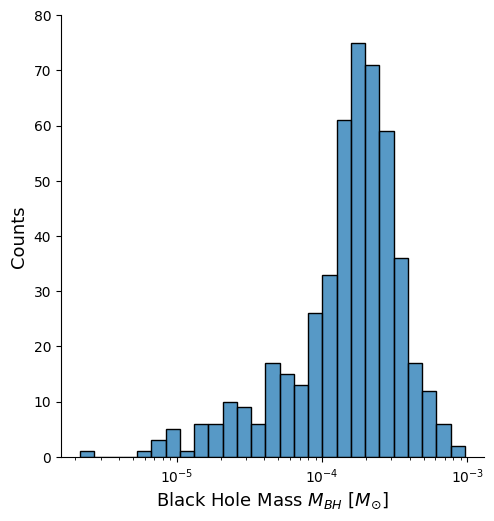

In [47]:
#Black Hole masses
import seaborn as sns
sns.displot(data=qso, x='Wu_BH_mass', palette='colorblind', log_scale=True)
plt.ylim(0, 80)

plt.ylabel('Counts', fontsize=13);
plt.xlabel(r'Black Hole Mass $M_{BH}$ [$M_{\odot}$]', fontsize=13);

plt.show()

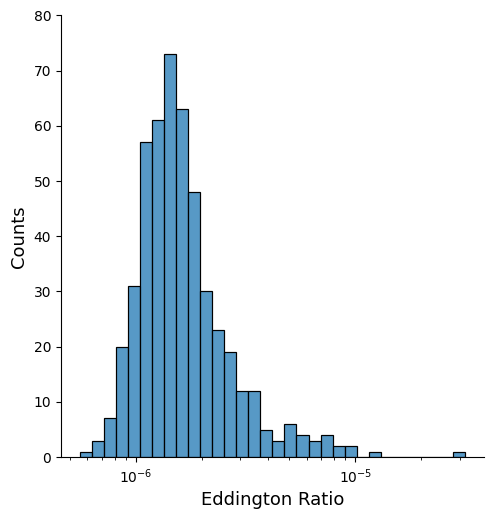

In [52]:
#Eddington ratios
sns.displot(data=qso, x='Edd_ratio', palette='colorblind', log_scale=True)
plt.ylim(0, 80)

plt.ylabel('Counts', fontsize=13);
plt.xlabel(r'Eddington Ratio', fontsize=13);


plt.show()

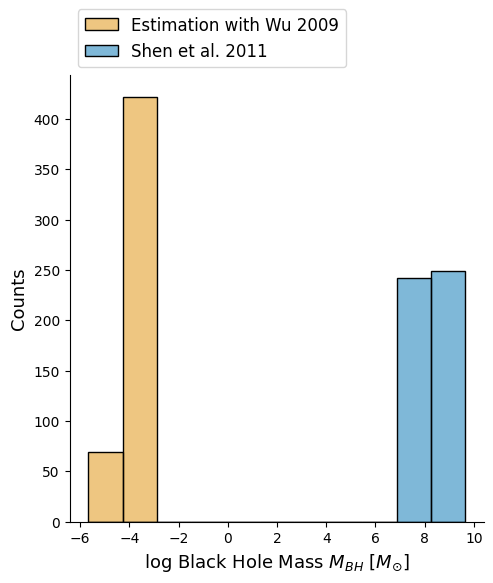

In [55]:
sns.displot(data=qso[['logBH', 'log_Wu_BH_mass']], palette='colorblind', 
            log_scale=False, legend=False)

plt.ylabel('Counts', fontsize=13);
plt.xlabel(r'log Black Hole Mass $M_{BH}$ [$M_{\odot}$]', fontsize=13);
plt.legend(['Estimation with Wu 2009', 'Shen et al. 2011'], loc='lower left', bbox_to_anchor=(0, 1), fontsize=12)

plt.show()

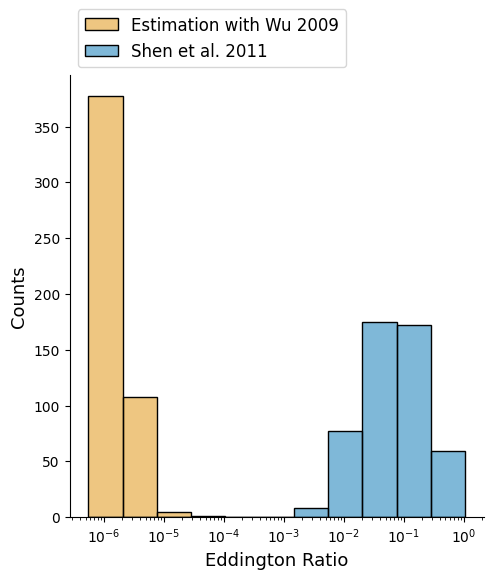

In [56]:
sns.displot(data=qso[['Shen_Edd_ratio', 'Edd_ratio']], palette='colorblind', 
            log_scale=True, legend=False)

plt.ylabel('Counts', fontsize=13);
plt.xlabel(r'Eddington Ratio', fontsize=13);
plt.legend(['Estimation with Wu 2009', 'Shen et al. 2011'], loc='lower left', bbox_to_anchor=(0, 1), fontsize=12)


plt.show()

In [59]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

x_train_, x_test_, y_train_, y_test_ = train_test_split(qso['my_log_L_h_beta'].to_numpy().reshape(-1, 1), 
                                                        qso['Wu_log_Lbol'].to_numpy().reshape(-1, 1), 
                                                        train_size=0.7, random_state=42)

ols_ = linear_model.LinearRegression()
linear_ = ols_.fit(x_train_, y_train_)  # fits the training data
y_pred_ = linear_.predict(x_test_)

# testing with the test set
print('Test MSE = ', mean_squared_error(y_test_, y_pred_))
print('Train MSE = ', mean_squared_error(y_train_, linear_.predict(x_train_)))

print('R2 Score: %.2f' % r2_score(y_test_, y_pred_))
print(' ')
print('Correlation Coefficients: \n', ols_.coef_)

Test MSE =  9.12520182255657e-30
Train MSE =  8.757965968167968e-30
R2 Score: 1.00
 
Correlation Coefficients: 
 [[0.94]]


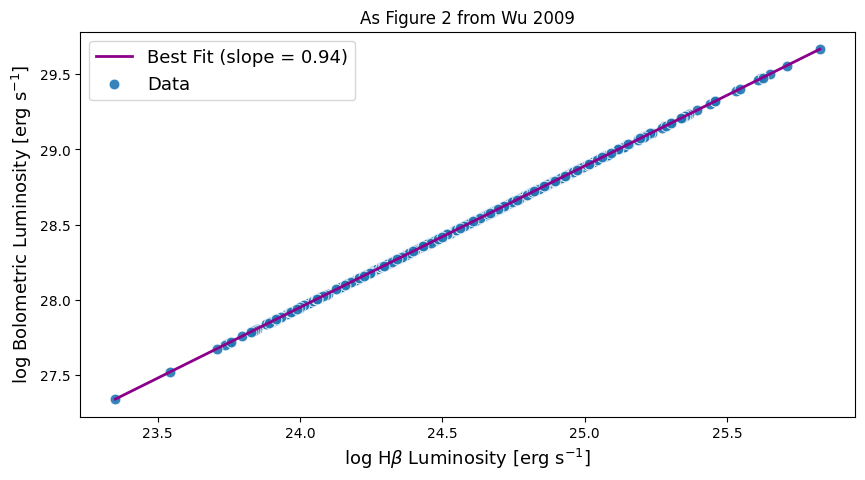

In [60]:
# Fig 2 from Wu 2009
# loglog: luminosities: H beta vs bol

f, ax = plt.subplots(figsize=(10, 5))

sns.scatterplot(data=qso, x='my_log_L_h_beta', y='Wu_log_Lbol', palette='colorblind', 
                s=60, alpha=0.9, label='Data')

x_to_plot = np.linspace(qso['my_log_L_h_beta'].min(), qso['my_log_L_h_beta'].max(), 50).reshape(-1, 1)
ax.plot(x_to_plot, linear_.predict(x_to_plot), '-', color='darkmagenta', linewidth=2, label='Best Fit (slope = 0.94)')

plt.xlabel(r'log H$\beta$ Luminosity [erg s$^{-1}$]', fontsize=13);
plt.ylabel(r'log Bolometric Luminosity [erg s$^{-1}$]', fontsize=13);
plt.title('As Figure 2 from Wu 2009')

plt.legend(fontsize=13);

plt.show()

My version of Figure 2 from Wu 2009.

In [61]:
x_train, x_test, y_train, y_test = train_test_split(qso['log_Edd_ratio'].to_numpy().reshape(-1, 1), 
                                                    qso['log_Wu_BH_mass'].to_numpy().reshape(-1, 1), 
                                                    train_size=0.7, random_state=42)

ols = linear_model.LinearRegression()
linear = ols.fit(x_train, y_train)  # fits the training data
y_pred = linear.predict(x_test)

# testing with the test set
print('Test MSE = ', mean_squared_error(y_test, y_pred))
print('Train MSE = ', mean_squared_error(y_train, linear.predict(x_train)))

print('R2 Score: %.2f' % r2_score(y_test, y_pred))
print(' ')
print('Correlation Coefficients: \n', ols.coef_)

Test MSE =  0.124298736197501
Train MSE =  0.1380068625836667
R2 Score: 0.13
 
Correlation Coefficients: 
 [[-0.70906212]]


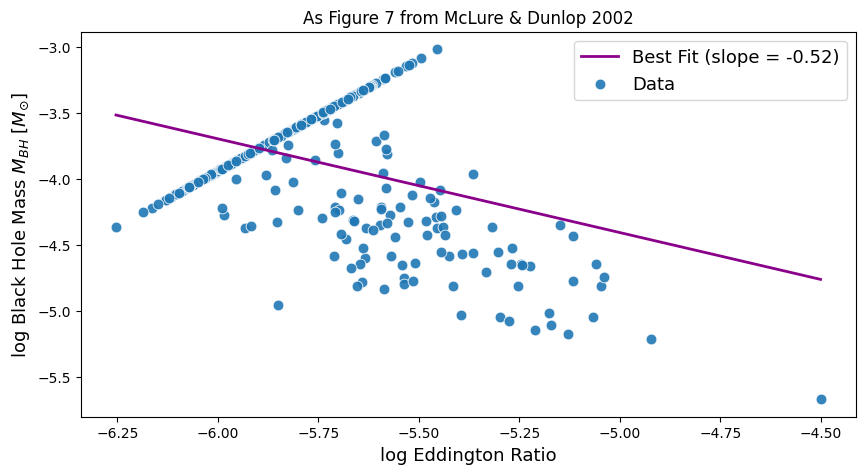

In [62]:
# Fig 7 from McLure & Dunlop 2002
# loglog: Edd ratio vs BH mass
# best linear fit
# Eddington limit

f, ax = plt.subplots(figsize=(10, 5))

sns.scatterplot(data=qso, x='log_Edd_ratio', y='log_Wu_BH_mass', palette='colorblind', 
                s=60, alpha=0.9, label='Data')

x_to_plot = np.linspace(qso['log_Edd_ratio'].min(), qso['log_Edd_ratio'].max(), 50).reshape(-1, 1)
ax.plot(x_to_plot, linear.predict(x_to_plot), '-', color='darkmagenta', linewidth=2, label='Best Fit (slope = -0.52)')

plt.xlabel('log Eddington Ratio', fontsize=13);
plt.ylabel(r'log Black Hole Mass $M_{BH}$ [$M_{\odot}$]', fontsize=13);
plt.title('As Figure 7 from McLure & Dunlop 2002')

plt.legend(fontsize=13);


plt.show()

## 2) Estimate MBH from galactic host bulge luminosity + estimation of accretion rate.

Calculate black hole mass for at least 10 objects from Wu (2009) using the relation between black hole mass and host galaxy absolute magnitude in the R band given in Wu (2009) and proposed by McLure & Dunlop (2002). Elaborate on the assumptions you have to make in order to use this relation. You will need to obtain magnitudes in Johnson-Cousins photometric system (e.g., you can try searching the NED database). Additionally, find the Eddington ratio and plot it against obtained black hole masses. Optionally, you can plot your black hole mass and Eddington ratio estimates against ones from Wu et al. (2009) and discuss what you find.

In [63]:
Wu_sample = pd.read_csv('Wu_2009_sample.csv', sep=',')
Wu_sample.drop('No.', axis=1, inplace=True)
Wu_sample

,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations,Redshift-independent Distances,Classifications,Images,Spectra
0,CGCG 186-048,176.842210,35.018756,G,1.887433e+04,0.062958,SLS,163,6.0,79,33,21,6.0,NaN,1.0,8.0,9.0,NaN
1,UGC 08782,208.074342,31.446250,G,1.354888e+04,0.045194,SPEC,383,12.0,191,48,32,14.0,3.0,NaN,8.0,16.0,5.0
2,3C 043,22.499205,23.638966,QSO,4.373972e+05,1.459000,SPEC,194,7.0,122,19,8,NaN,NaN,NaN,5.0,6.0,NaN
3,3C 048,24.422081,33.159759,QSO,1.106234e+05,0.369000,SLS,799,18.0,259,44,16,4.0,NaN,NaN,6.0,16.0,1.0
4,[HB89] 0237-233,40.034060,-23.154369,QSO,6.664386e+05,2.223000,SLS,440,8.0,110,41,19,NaN,NaN,NaN,4.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,WISEA J195930.12+620644.8,299.875500,62.112417,QSO,5.468214e+05,1.824000,NaN,18,1.0,18,4,1,NaN,1.0,NaN,1.0,NaN,NaN
61,WISEA J235509.45+495008.3,358.789411,49.835650,G,7.132063e+04,0.237900,NaN,191,3.0,62,15,5,NaN,NaN,NaN,5.0,11.0,1.0
62,WISEA J013416.90-425826.2,23.570417,-42.974167,G,7.109098e+04,0.237134,SLS,39,2.0,34,8,4,NaN,NaN,NaN,1.0,1.0,1.0
63,WISEA J153929.53+591100.6,234.872958,59.183528,QSO,1.162595e+06,3.878000,NaN,15,NaN,18,3,1,NaN,NaN,NaN,2.0,NaN,NaN


In [64]:
simbad_Wu_sample = pd.read_csv('simbad_Wu_2009.csv', delimiter=',')
simbad_Wu_sample.drop('N', axis=1, inplace=True)
simbad_Wu_sample

,Identifier,Otype,RA,DEC,Mag B,Mag V,Mag R
0,7C 1144+3517,BLL,11 47 22.1297825184,+35 01 07.538786184,17.890,16.83,10.260
1,7C 155054.79+581551.00,QSO,15 51 58.2078070152,+58 06 44.454684204,17.030,16.73,15.600
2,ICRF J134733.3+121724,Sy2,13 47 33.36161873,+12 17 24.2398927,19.280,18.44,15.718
3,2MASX J20210438-2235183,Sy1,20 21 04.0639,-22 35 25.775,17.530,16.80,16.280
4,2MASS J01341690-4258262,Sy1,01 34 16.9072341600,-42 58 26.223391344,18.170,17.30,16.710
5,ICRF J182931.7+484446,Sy1,18 29 31.7809732968,+48 44 46.160168892,17.050,16.81,16.860
6,QSO B2134+0028,QSO,21 36 38.58632232,+00 41 54.2128562,17.300,17.08,17.020
7,QSO B1946+708,BLL,19 45 53.51966298,+70 55 48.7285673,18.726,16.70,17.199
8,3C 186,QSO,07 44 17.4720658920,+37 53 17.250697320,17.500,18.14,17.200
9,ICRF J145907.5+714019,Sy1,14 59 07.58390804,+71 40 19.8668093,17.240,16.78,17.200


In [65]:
# re-writing RA and DEC so that astropy can process them
def hms_str_formatting(coor, ra_or_dec):
    '''
    Input:
    coor: coordinate
    ra_or_dec: 'ra' or 'dec'. astropy needs to know

    Output:
    coor ready for astropy
    '''
    if ra_or_dec == 'ra':
        h = coor[0:2]
        m = coor[3:5]
        s = coor[6:]
        string = h + 'h' + m + 'm' + s + 's'
    elif ra_or_dec == 'dec':
        sign = coor[0]
        d = coor[1:3]
        m = coor[4:6]
        s = coor[7:]
        string = sign + d + 'd' + m + 'm' + s + 's'
    return string

In [66]:
simbad_Wu_sample['RA_astropy'] = simbad_Wu_sample.apply(lambda x: hms_str_formatting(x['RA'], 'ra'), axis=1)
simbad_Wu_sample['DEC_astropy'] = simbad_Wu_sample.apply(lambda x: hms_str_formatting(x['DEC'], 'dec'), axis=1)
simbad_Wu_sample[['RA', 'DEC', 'RA_astropy', 'DEC_astropy']]

,RA,DEC,RA_astropy,DEC_astropy
0,11 47 22.1297825184,+35 01 07.538786184,11h47m22.1297825184s,+35d01m07.538786184s
1,15 51 58.2078070152,+58 06 44.454684204,15h51m58.2078070152s,+58d06m44.454684204s
2,13 47 33.36161873,+12 17 24.2398927,13h47m33.36161873s,+12d17m24.2398927s
3,20 21 04.0639,-22 35 25.775,20h21m04.0639s,-22d35m25.775s
4,01 34 16.9072341600,-42 58 26.223391344,01h34m16.9072341600s,-42d58m26.223391344s
5,18 29 31.7809732968,+48 44 46.160168892,18h29m31.7809732968s,+48d44m46.160168892s
6,21 36 38.58632232,+00 41 54.2128562,21h36m38.58632232s,+00d41m54.2128562s
7,19 45 53.51966298,+70 55 48.7285673,19h45m53.51966298s,+70d55m48.7285673s
8,07 44 17.4720658920,+37 53 17.250697320,07h44m17.4720658920s,+37d53m17.250697320s
9,14 59 07.58390804,+71 40 19.8668093,14h59m07.58390804s,+71d40m19.8668093s


In [67]:
def hms_to_deg(row):
    ra_hms = row['RA_astropy']
    dec_dms = row['DEC_astropy']
    
    c = SkyCoord(ra_hms, dec_dms, frame='icrs')

    return c

In [69]:
from astropy.coordinates import SkyCoord
simbad_Wu_sample['RA_deg'] = simbad_Wu_sample.apply(lambda x: hms_to_deg(x).ra.deg, axis=1)
simbad_Wu_sample['DEC_deg'] = simbad_Wu_sample.apply(lambda x: hms_to_deg(x).dec.deg, axis=1)
simbad_Wu_sample[['RA_deg', 'DEC_deg']]

,RA_deg,DEC_deg
0,176.842207,35.018761
1,237.992533,58.112349
2,206.889007,12.290067
3,305.266933,-22.590493
4,23.570447,-42.973951
5,277.382421,48.746156
6,324.160776,0.698392
7,296.472999,70.930202
8,116.072800,37.888125
9,224.781600,71.672185


In [70]:
Wu_sample.loc[Wu_sample['RA'] - simbad_Wu_sample['RA_deg'] < 0.0001].shape

(17, 18)

In [71]:
simbad_Wu_sample['redshift'] = Wu_sample.loc[Wu_sample['RA'] - simbad_Wu_sample['RA_deg'] < 0.0001]['Redshift']
simbad_Wu_sample['redshift'].describe()

count    17.000000
mean      0.971304
std       0.945795
min       0.045194
25%       0.305981
50%       0.692000
75%       1.436208
max       3.540681
Name: redshift, dtype: float64

In [72]:
simbad_Wu_sample['D_L'] = simbad_Wu_sample.apply(lambda x: np.float64(cosmo.luminosity_distance(np.float64(x['redshift']))) * 1e6, axis=1)
simbad_Wu_sample['D_L']  # in pc

0     2.915252e+08
1     2.066521e+08
2     1.080369e+10
3     2.034141e+09
4              NaN
5     1.969474e+10
6     4.832565e+09
7     3.232231e+09
8     7.333107e+09
9     1.559720e+10
10             NaN
11    1.345979e+09
12    1.723712e+09
13    7.244062e+09
14             NaN
15    1.059628e+10
16    3.168330e+10
17             NaN
18             NaN
19             NaN
20    4.316739e+09
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27    1.277430e+09
28    1.636379e+09
Name: D_L, dtype: float64

In [73]:
def abs_mag(apa_mag, distance):
    return apa_mag - 5 * np.log10(distance) + 5

In [74]:
simbad_Wu_sample['Abs Mag R'] = simbad_Wu_sample.apply(lambda x: abs_mag(x['Mag R'], x['D_L']), axis=1)
simbad_Wu_sample['Abs Mag R'].describe()

count    16.000000
mean    -25.789351
std       3.075861
min     -29.611751
25%     -27.655633
50%     -26.700400
75%     -23.810790
max     -20.621686
Name: Abs Mag R, dtype: float64

In [75]:
def M_BH_Rmag(M_R, log=True):
    '''
    Formula #7 from Wu 2000

    Inputs:
    M_R: R band absolute magnitude

    Output:
    BH mass in solar masses
    If log is set to True (default), output is log of the BH mass
    If log is set to False, output is simple BH mass, not log
    '''
    BH_mass = - 0.5 * M_R - 2.74
    if log:
        return BH_mass
    else:
        return 10**BH_mass

In [76]:
simbad_Wu_sample['M_BH_Rmag'] = simbad_Wu_sample.apply(lambda x: M_BH_Rmag(x['Abs Mag R'], log=False), axis=1)
simbad_Wu_sample['log_M_BH_Rmag'] = simbad_Wu_sample.apply(lambda x: M_BH_Rmag(x['Abs Mag R']), axis=1)
simbad_Wu_sample[['M_BH_Rmag', 'log_M_BH_Rmag']].describe()

,M_BH_Rmag,log_M_BH_Rmag
count,1.600000e+01,16.000000
mean,2.444388e+11,10.154676
std,4.163607e+11,1.537931
min,3.722573e+07,7.570843
25%,1.507403e+09,9.165395
50%,4.320396e+10,10.610200
75%,1.697599e+11,11.087817
max,1.163793e+12,12.065876


In [77]:
simbad_Wu_sample['L_Edd_MR'] = simbad_Wu_sample.apply(lambda x: L_Edd(x['M_BH_Rmag']), axis=1)
simbad_Wu_sample['log_L_Edd_MR'] = np.log10(simbad_Wu_sample['L_Edd_MR'])
simbad_Wu_sample[['L_Edd_MR', 'log_L_Edd_MR']].describe()

,L_Edd_MR,log_L_Edd_MR
count,1.600000e+01,16.000000
mean,3.373255e+49,48.294555
std,5.745778e+49,1.537931
min,5.137150e+45,45.710722
25%,2.080216e+47,47.305274
50%,5.962146e+48,48.750079
75%,2.342686e+49,49.227696
max,1.606034e+50,50.205755


In [78]:
L0 = 3.0128e35
simbad_Wu_sample['L_R'] = simbad_Wu_sample.apply(lambda x: L0 * 10**(-0.4 * x['Abs Mag R']), axis=1)
simbad_Wu_sample['L_bol_MR'] = simbad_Wu_sample.apply(lambda x: 10 * x['L_R'], axis=1)
simbad_Wu_sample[['L_Edd_MR', 'L_R', 'L_bol_MR']].describe()

,L_Edd_MR,L_R,L_bol_MR
count,1.600000e+01,1.600000e+01,1.600000e+01
mean,3.373255e+49,4.911757e+46,4.911757e+47
std,5.745778e+49,7.593014e+46,7.593014e+47
min,5.137150e+45,5.341274e+43,5.341274e+44
25%,2.080216e+47,1.027268e+45,1.027268e+46
50%,5.962146e+48,1.497785e+46,1.497785e+47
75%,2.342686e+49,4.270456e+46,4.270456e+47
max,1.606034e+50,2.107030e+47,2.107030e+48


In [79]:
simbad_Wu_sample['Edd_ratio_MR'] = simbad_Wu_sample.apply(lambda x: Edd_ratio(x['L_Edd_MR'], x['L_bol_MR']), axis=1)
simbad_Wu_sample['log_Edd_ratio_MR'] = np.log10(simbad_Wu_sample['Edd_ratio_MR'])
simbad_Wu_sample[['Edd_ratio_MR', 'log_Edd_ratio_MR']].describe()

,Edd_ratio_MR,log_Edd_ratio_MR
count,16.000000,16.000000
mean,0.040559,-1.499844
std,0.031566,0.307586
min,0.013119,-1.882084
25%,0.020796,-1.686472
50%,0.025709,-1.590949
75%,0.049957,-1.301988
max,0.103973,-0.983077


In [80]:
simbad_Wu_sample_nonan = simbad_Wu_sample.dropna()

In [81]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(simbad_Wu_sample_nonan['log_M_BH_Rmag'].to_numpy().reshape(-1, 1), 
                                                            simbad_Wu_sample_nonan['Abs Mag R'].to_numpy().reshape(-1, 1), 
                                                            train_size=0.7, random_state=42)

ols_2 = linear_model.LinearRegression()
linear_2 = ols_2.fit(x_train_2, y_train_2)  # fits the training data
y_pred_2 = linear_2.predict(x_test_2)

# testing with the test set
print('Test MSE = ', mean_squared_error(y_test_2, y_pred_2))
print('Train MSE = ', mean_squared_error(y_train_2, linear_2.predict(x_train_2)))

print('R2 Score: %.2f' % r2_score(y_test_2, y_pred_2))
print(' ')
print('Correlation Coefficients: \n', ols_2.coef_)

Test MSE =  1.0097419586828952e-29
Train MSE =  1.1474340439578353e-29
R2 Score: 1.00
 
Correlation Coefficients: 
 [[-2.]]


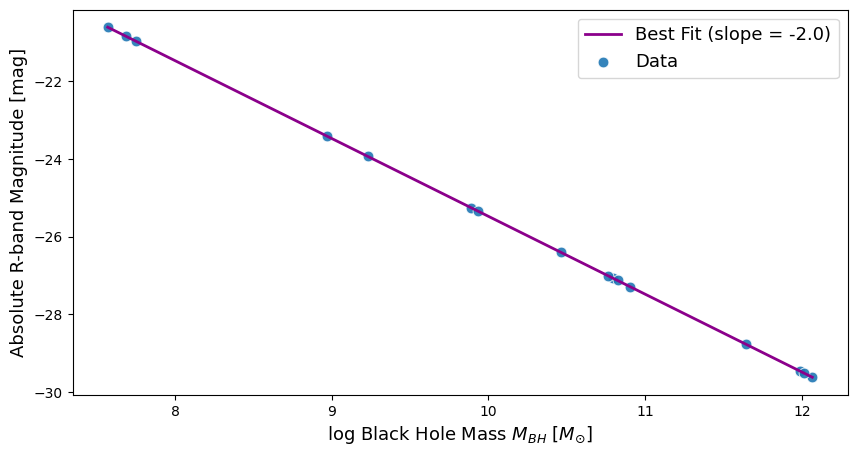

In [82]:
f, ax = plt.subplots(figsize=(10, 5))

sns.scatterplot(data=simbad_Wu_sample_nonan, x='log_M_BH_Rmag', y='Abs Mag R', palette='colorblind', 
                s=60, alpha=0.9, label='Data')

x_to_plot = np.linspace(simbad_Wu_sample_nonan['log_M_BH_Rmag'].min(), 
                        simbad_Wu_sample_nonan['log_M_BH_Rmag'].max(), 
                        50).reshape(-1, 1)
ax.plot(x_to_plot, linear_2.predict(x_to_plot), '-', color='darkmagenta', linewidth=2, label='Best Fit (slope = -2.0)')

plt.xlabel(r'log Black Hole Mass $M_{BH}$ [$M_{\odot}$]', fontsize=13);
plt.ylabel('Absolute R-band Magnitude [mag]', fontsize=13);

plt.legend(fontsize=13);

plt.show()

In [83]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(simbad_Wu_sample_nonan['log_Edd_ratio_MR'].to_numpy().reshape(-1, 1), 
                                                            simbad_Wu_sample_nonan['log_M_BH_Rmag'].to_numpy().reshape(-1, 1), 
                                                            train_size=0.7, random_state=42)

ols_1 = linear_model.LinearRegression()
linear_1 = ols_1.fit(x_train_1, y_train_1)  # fits the training data
y_pred_1 = linear_1.predict(x_test_1)

# testing with the test set
print('Test MSE = ', mean_squared_error(y_test_1, y_pred_1))
print('Train MSE = ', mean_squared_error(y_train_1, linear_1.predict(x_train_1)))

print('R2 Score: %.2f' % r2_score(y_test_1, y_pred_1))
print(' ')
print('Correlation Coefficients: \n', ols_1.coef_)

Test MSE =  3.7865323450608565e-30
Train MSE =  3.442302131873506e-30
R2 Score: 1.00
 
Correlation Coefficients: 
 [[-5.]]


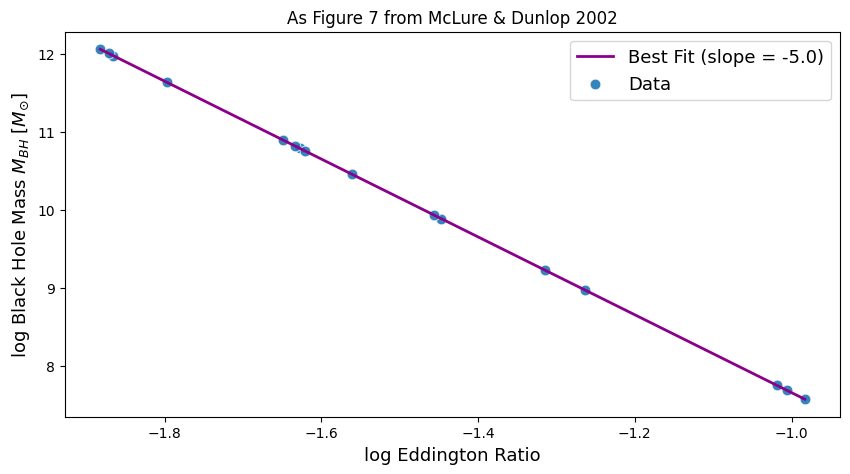

In [84]:
# Fig 7 from McLure & Dunlop 2002
# loglog: Edd ratio vs BH mass
# best linear fit
# Eddington limit

f, ax = plt.subplots(figsize=(10, 5))

sns.scatterplot(data=simbad_Wu_sample_nonan, x='log_Edd_ratio_MR', y='log_M_BH_Rmag', palette='colorblind', 
                s=60, alpha=0.9, label='Data')

x_to_plot = np.linspace(simbad_Wu_sample_nonan['log_Edd_ratio_MR'].min(), 
                        simbad_Wu_sample_nonan['log_Edd_ratio_MR'].max(), 
                        50).reshape(-1, 1)
ax.plot(x_to_plot, linear_1.predict(x_to_plot), '-', color='darkmagenta', linewidth=2, label='Best Fit (slope = -5.0)')

plt.xlabel('log Eddington Ratio', fontsize=13);
plt.ylabel(r'log Black Hole Mass $M_{BH}$ [$M_{\odot}$]', fontsize=13);
plt.title('As Figure 7 from McLure & Dunlop 2002')

plt.legend(fontsize=13);

plt.show()

In [85]:
both_samples = pd.concat([qso, simbad_Wu_sample], ignore_index=True)
both_samples.columns

Index(['RAJ2000', 'DEJ2000', 'Plate', 'Fiber', 'MJD', 'iMAG', 'logLbol',
       'e_logLbol', 'logLBHb', 'e_logLBHb', 'W_BHb_', 'e_W_BHb_', 'EWBHb',
       'e_EWBHb', 'SN_Hb_', 'logBH', 'e_logBH', 'logEdd', 'found', 'z',
       'Flux_Hb', 'FWHM_Hb', 'lum_dist', 'my_L_h_beta', 'my_log_L_h_beta',
       'Wu_BH_mass', 'log_Wu_BH_mass', 'Wu_log_Lbol', 'Wu_Lbol', 'L_Edd',
       'log_L_Edd', 'Shen_L_Edd', 'log_Shen_L_Edd', 'Edd_ratio',
       'log_Edd_ratio', 'Shen_Edd_ratio', 'log_Shen_Edd_ratio', 'Identifier',
       'Otype', 'RA', 'DEC', 'Mag B', 'Mag V', 'Mag R', 'RA_astropy',
       'DEC_astropy', 'RA_deg', 'DEC_deg', 'redshift', 'D_L', 'Abs Mag R',
       'M_BH_Rmag', 'log_M_BH_Rmag', 'L_Edd_MR', 'log_L_Edd_MR', 'L_R',
       'L_bol_MR', 'Edd_ratio_MR', 'log_Edd_ratio_MR'],
      dtype='object')

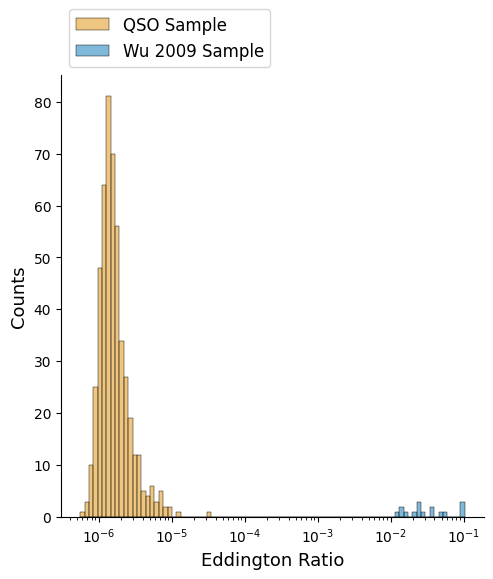

In [86]:
sns.displot(data=both_samples[['Edd_ratio_MR', 'Edd_ratio']], palette='colorblind', 
            log_scale=True, legend=False)

plt.ylabel('Counts', fontsize=13);
plt.xlabel(r'Eddington Ratio', fontsize=13);
plt.legend(['QSO Sample', 'Wu 2009 Sample'], loc='lower left', bbox_to_anchor=(0, 1), fontsize=12)

plt.show()

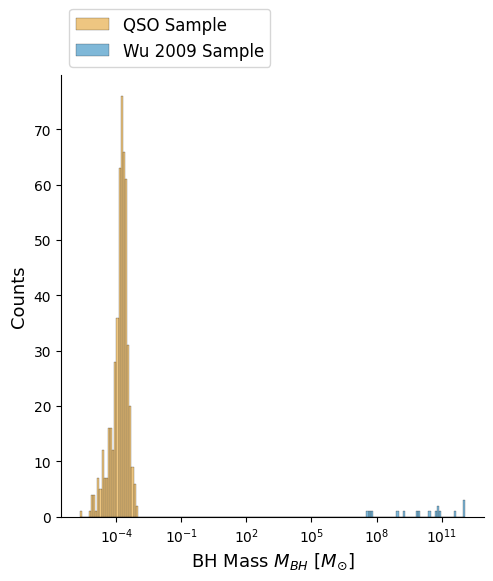

In [87]:
sns.displot(data=both_samples[['M_BH_Rmag', 'Wu_BH_mass']], palette='colorblind', 
            log_scale=True, legend=False)

plt.ylabel('Counts', fontsize=13);
plt.xlabel(r'BH Mass $M_{BH}$ [$M_{\odot}$]', fontsize=13);
plt.legend(['QSO Sample', 'Wu 2009 Sample'], loc='lower left', bbox_to_anchor=(0, 1), fontsize=12)

plt.show()